# Ula Yousef 

In [8]:
#first step import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# second step is reading the data 
data=pd.read_csv("http://bit.ly/w-data")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

<AxesSubplot:title={'center':'scatter of Hours and Scores'}, xlabel='Hours', ylabel='Scores'>

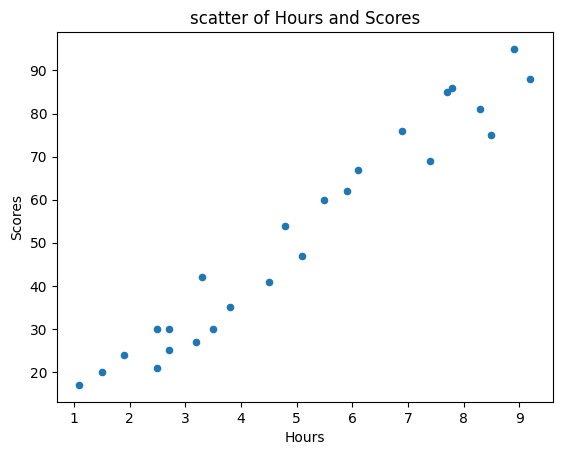

In [12]:
# third step is plotting our data
data.plot.scatter(x='Hours', y='Scores', title='scatter of Hours and Scores')

In [11]:
print(data.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


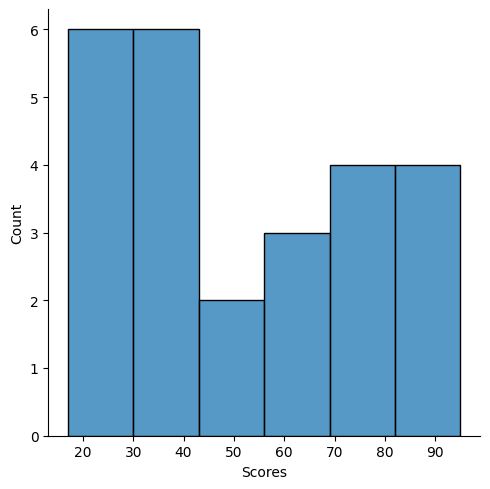

In [9]:
sns.displot(data['Scores'])

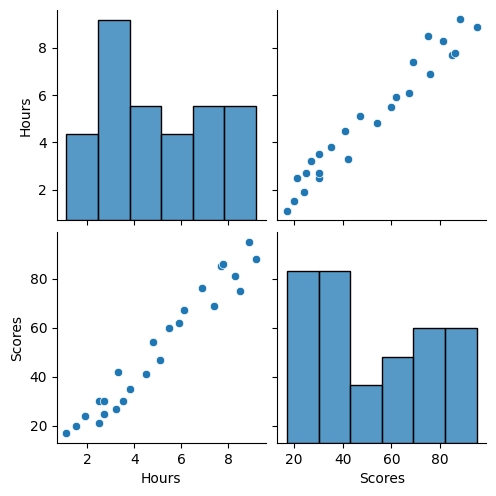

In [10]:
sns.pairplot(data)

In [18]:
# fourth step is divide our data into (input:attribute) and (output:labels)
X=data['Hours'].values
y=data['Scores'].values
X=X.reshape(-1, 1)
y=y.reshape(-1,1)


In [19]:
# fifth step is  split the data into test set and train set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [20]:
# sixth step fit the model
from sklearn.linear_model import LinearRegression

print('Training set size: {}'
     .format(X_train.shape[0]))
print('Test set size: {}'
     .format(X_test.shape[0]))
linreg = LinearRegression().fit(X_train,y_train)

Training set size: 20
Test set size: 5


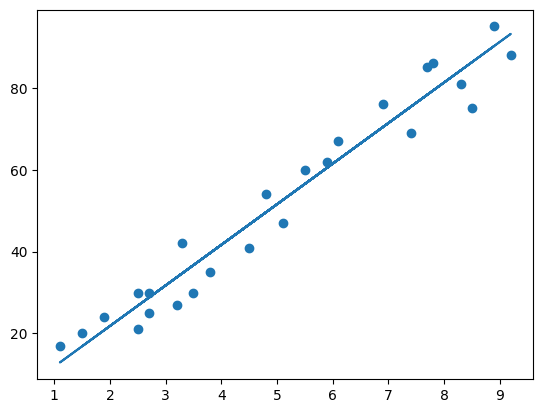

In [21]:
# seventh step Plotting the regression line

line = linreg.coef_*X+linreg.intercept_
plt.scatter(X, y)
plt.plot(X, line)
plt.show()

In [22]:
# eighth step make predict
y_pred=linreg.predict(X_test)
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [23]:
#ninth step is predict the value that is given 
score = linreg.predict([[9.5]])
print(score)

[[96.16939661]]


In [24]:
# tinth step is comparing my predict values with the actual values
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


In [25]:
# calculate the error in my predictions
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 4.18
Mean squared error: 21.60
Root mean squared error: 4.65
